# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from yellowbrick.classifier import *
#import shap
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.naive_bayes import *
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import loguniform
from skopt import BayesSearchCV
from sklearn import metrics
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier 
from feature import *
from Modelling import *

# Read dataset

In [2]:
data =  pd.read_excel('bank-full.xlsx')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# Exploratory data analysis

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB

DataFrame Description:
           age   balance      day  duration  campaign    pd

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


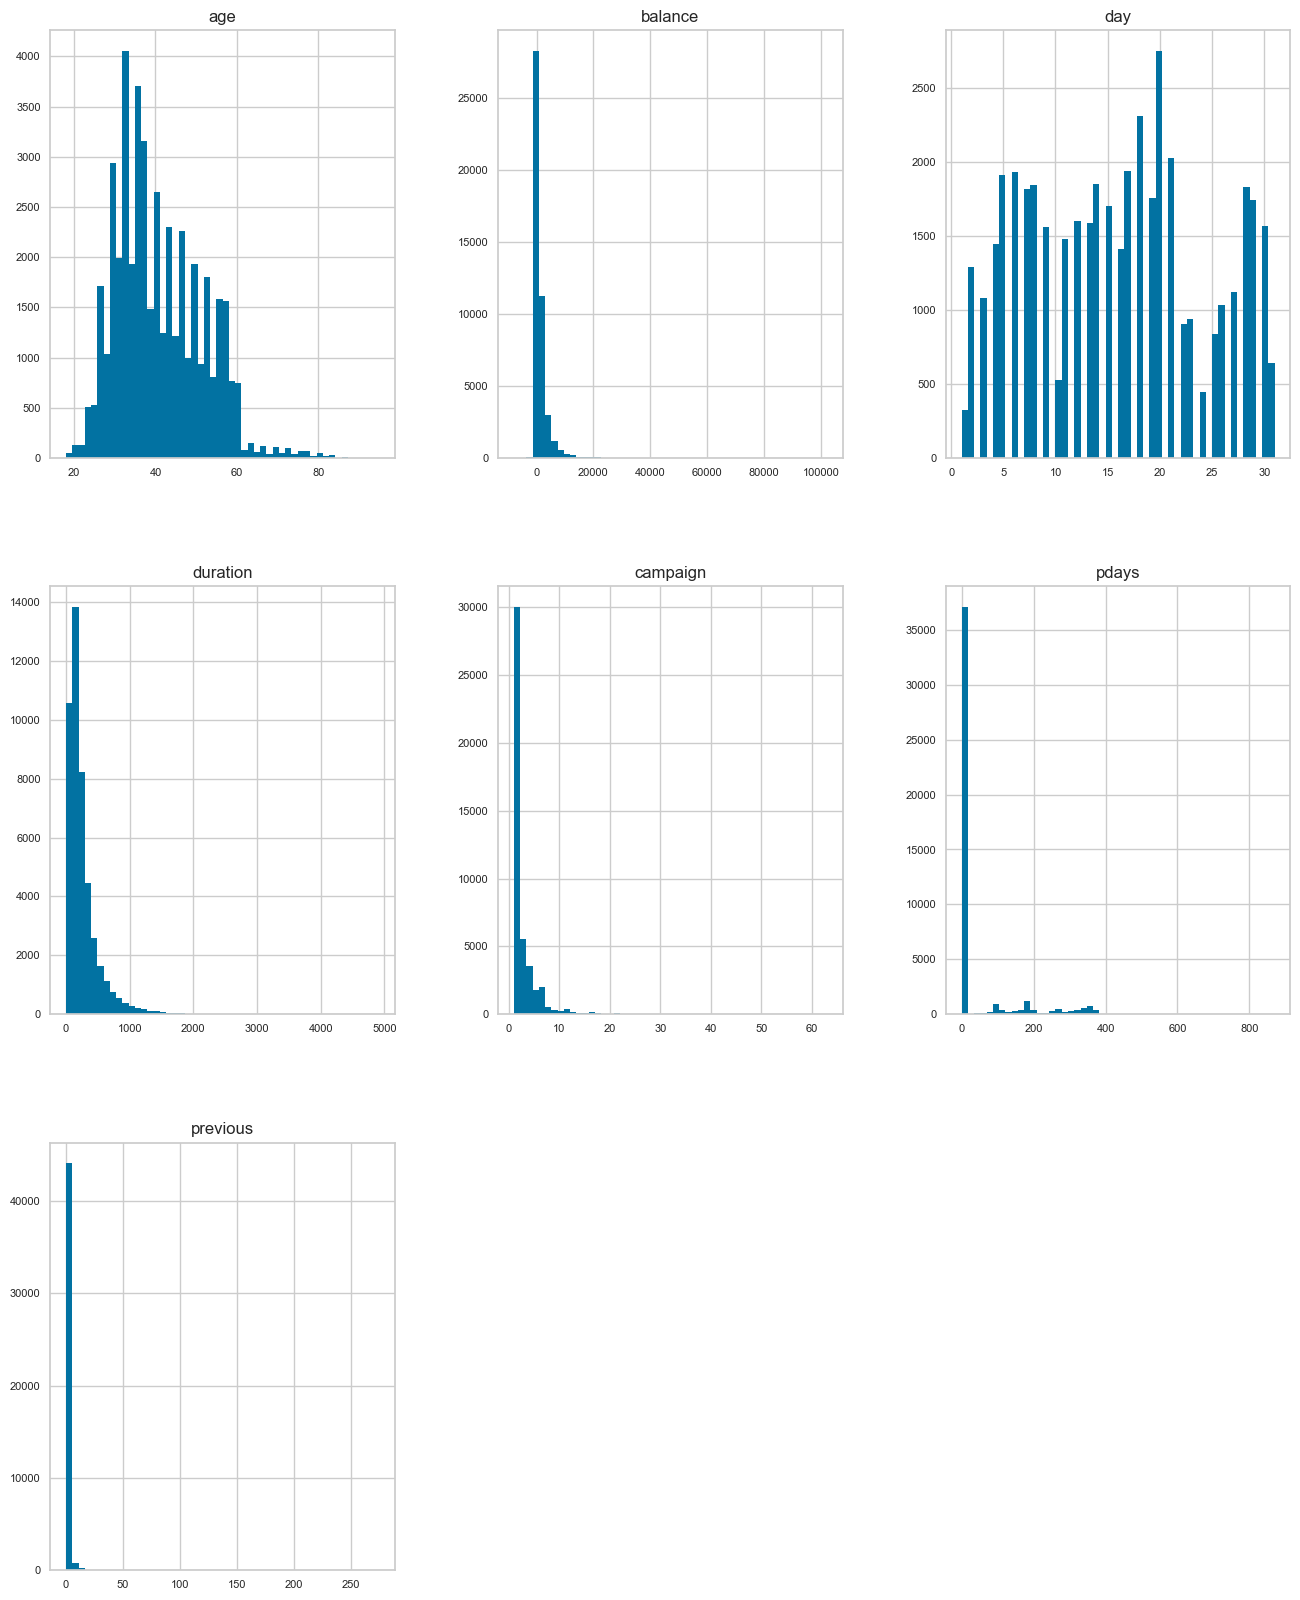

In [6]:
def data_preprocessing(data):
    # Display DataFrame info
    print("DataFrame Info:")
    data.info()

    # Display DataFrame description
    print("\nDataFrame Description:")
    print(data.describe())

    # Display null values count
    print("\nNull Values Count:")
    print(data.isnull().sum())

    # Display duplicated rows count
    print("\nDuplicated Rows Count:", data.duplicated().sum())

    # Display number of unique values in each column
    print("\nNumber of Unique Values in Each Column:")
    print(data.nunique())
    
    # Plot histrogram for all column
    data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
    
    return data
data = data_preprocessing(data)
data


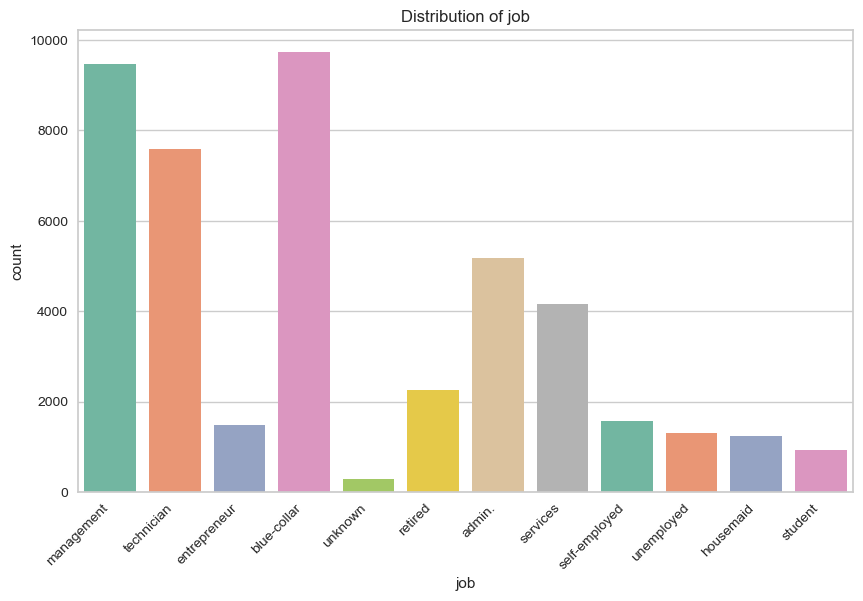

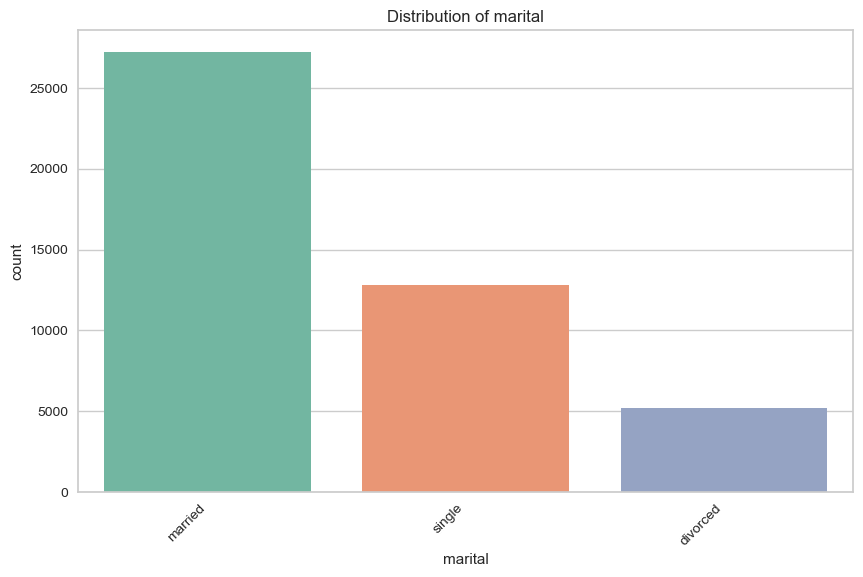

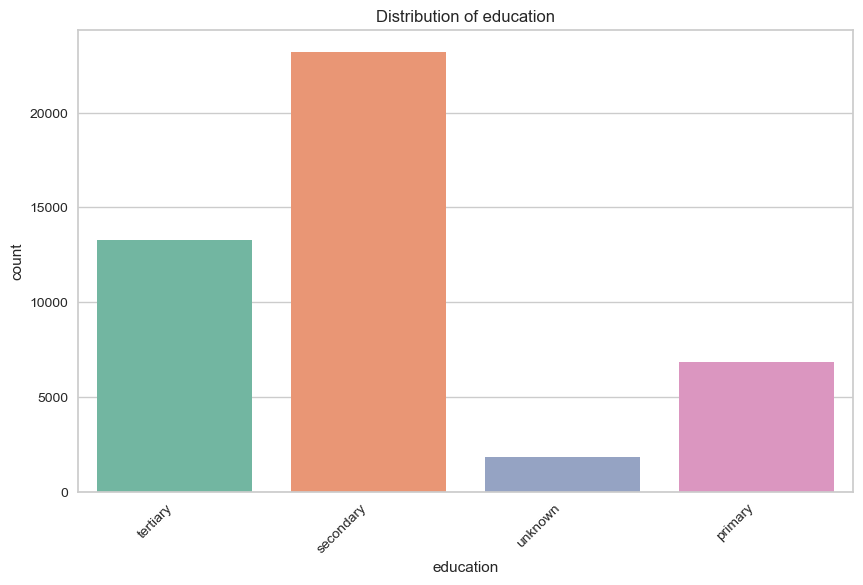

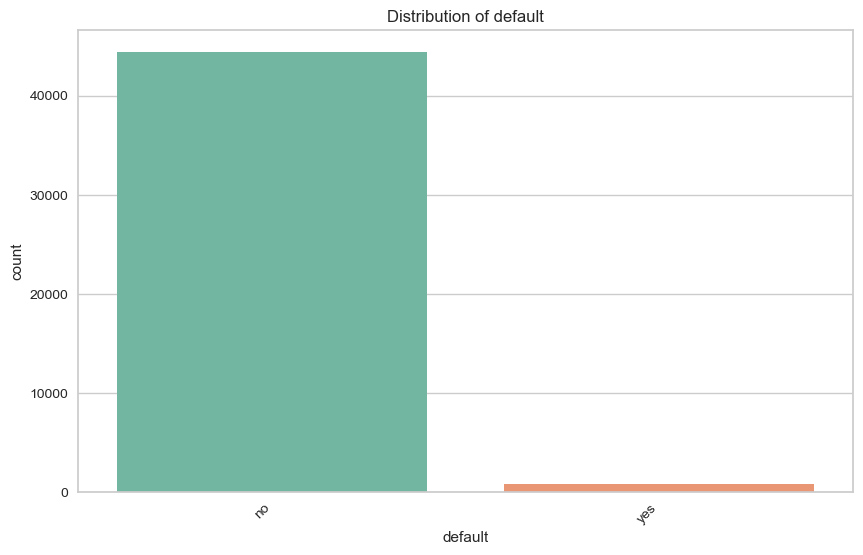

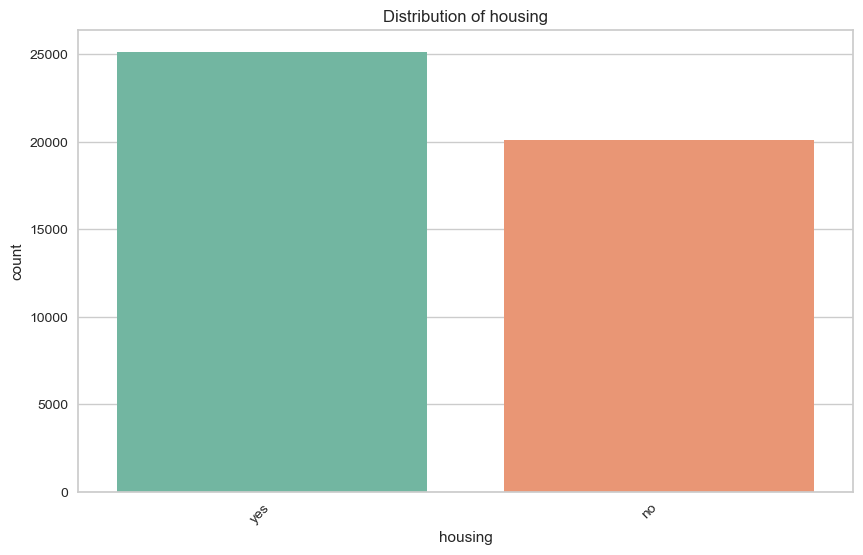

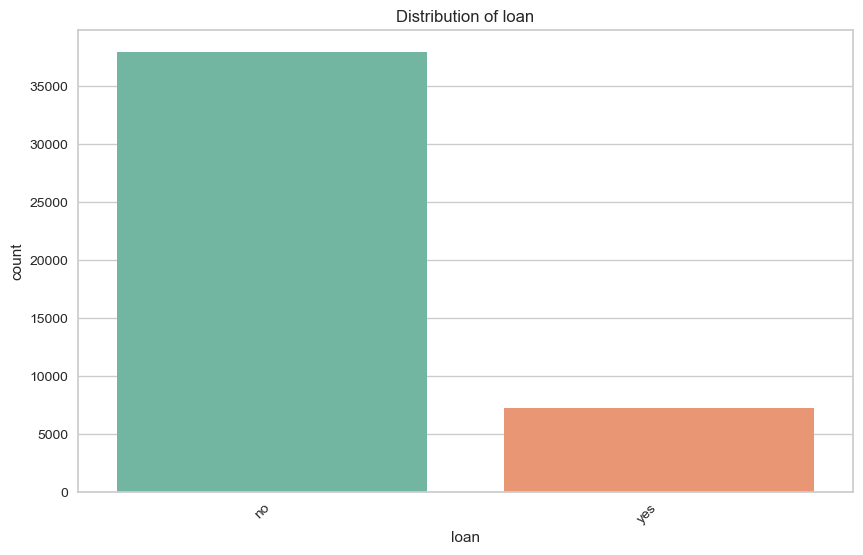

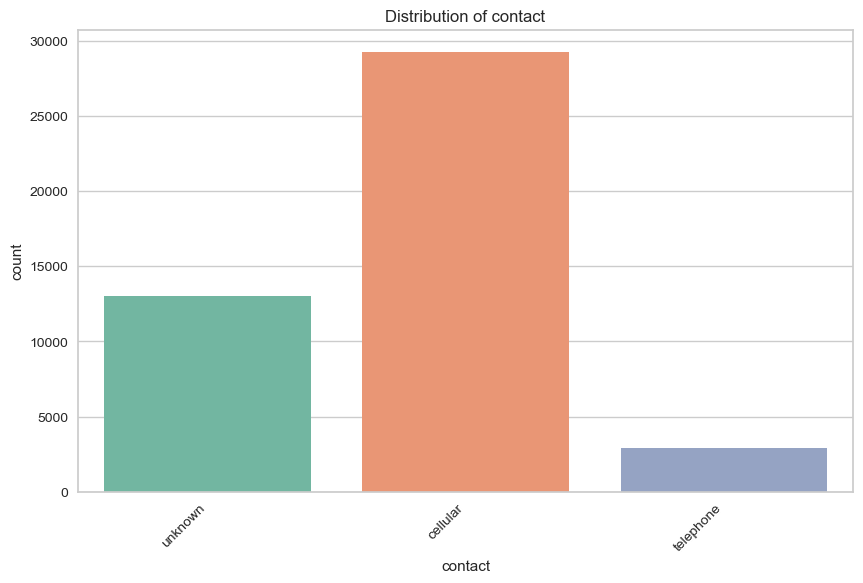

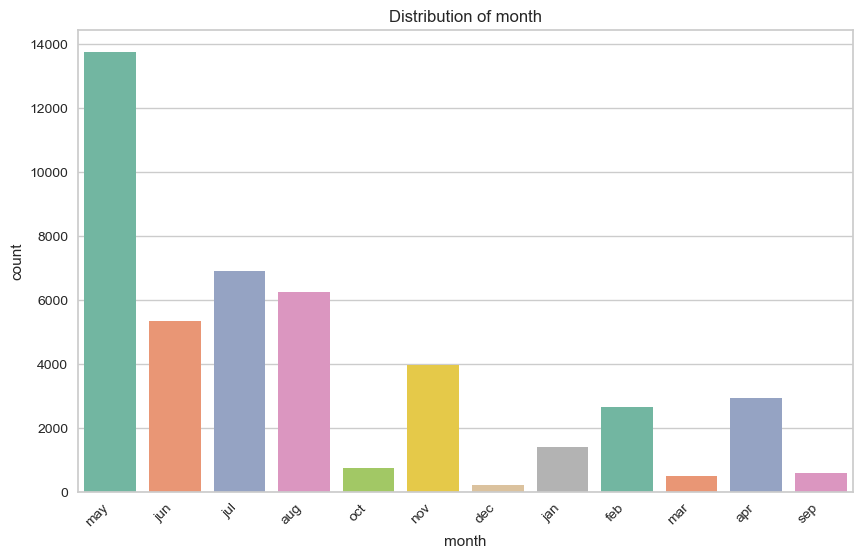

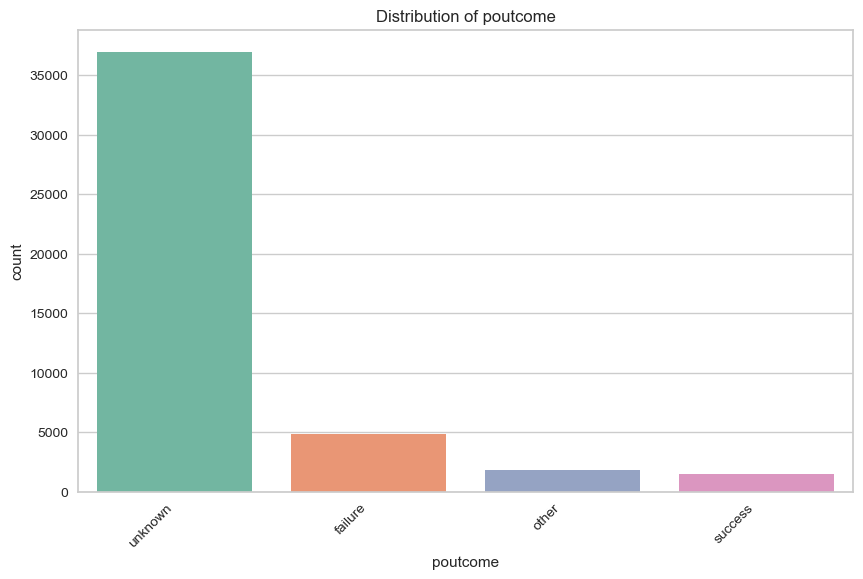

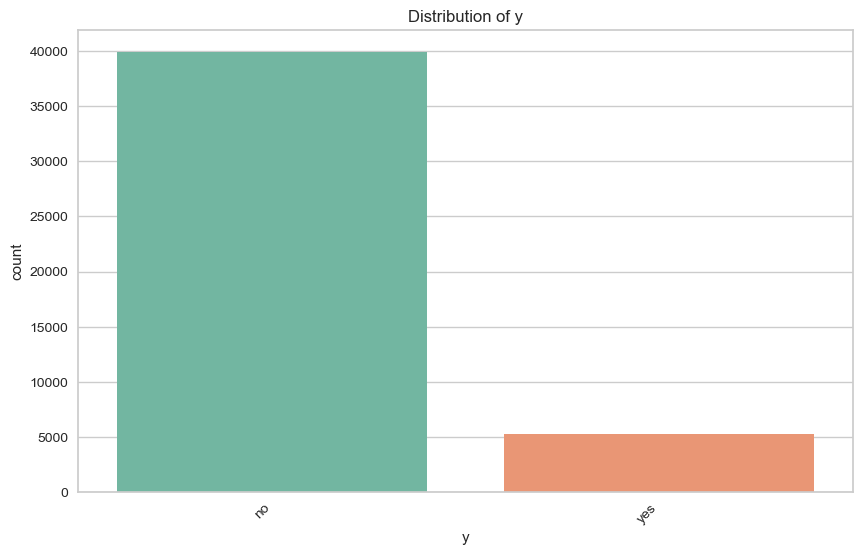

In [7]:
# Visualize the distribution of categorical variables
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=data, palette='Set2')
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Distribution of {col}')
    plt.show()

C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\seaborn\matrix.py:213: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.cmap = mpl.cm.get_cmap(cmap)


<Axes: >

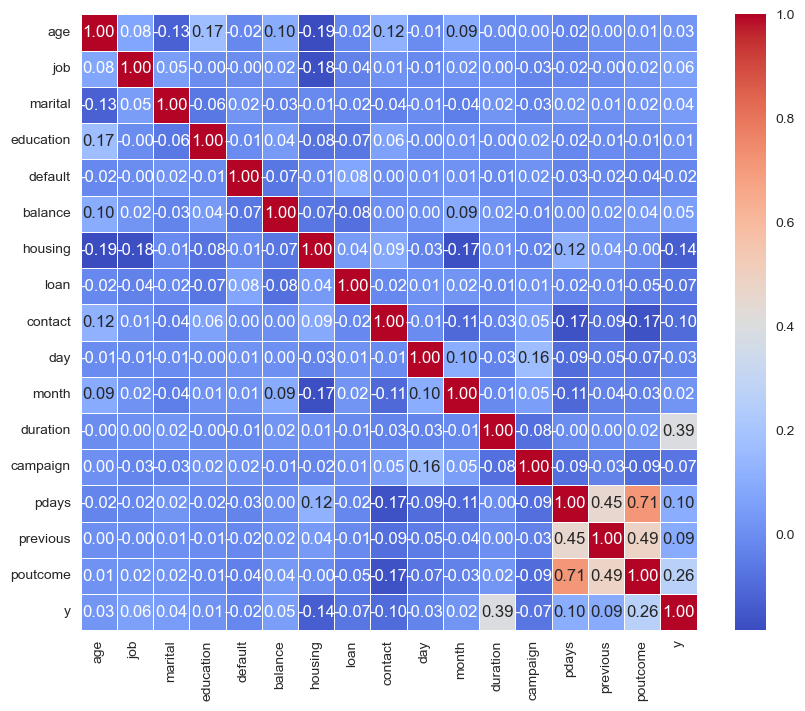

In [80]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f", square=True)


# Categorical data label encoding

In [3]:
# Initialize the label encoder
label_encoder = LabelEncoder()

# Iterate through each column and apply label encoding
for column in data.columns:
    data[column] = label_encoder.fit_transform(data[column])

# Concatenate the label-encoded features with the target variable
data = pd.concat([data], axis=1)

data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,40,4,1,2,0,3036,1,0,2,4,8,261,0,0,0,3,0
1,26,9,2,1,0,945,1,0,2,4,8,151,0,0,0,3,0
2,15,2,1,1,0,918,1,1,2,4,8,76,0,0,0,3,0
3,29,1,1,3,0,2420,1,0,2,4,8,92,0,0,0,3,0
4,15,11,2,3,0,917,0,0,2,4,8,198,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,33,9,1,2,0,1741,0,0,0,16,9,975,2,0,0,3,1
45207,53,5,0,0,0,2639,0,0,0,16,9,456,1,0,0,3,1
45208,54,5,1,1,0,5455,0,0,0,16,9,1116,4,181,3,2,1
45209,39,1,1,1,0,1584,0,0,1,16,9,508,3,0,0,3,0


In [12]:
# separating the data & label
X = data.drop(columns = ['y'],axis=1)
y = data['y']

# Feature Importance

In [5]:
# Call the function with default parameters
accuracy_rf = feature_selection_with_RandomForest(X, y)


Feature Importance:
      Feature  Importance
11   duration    0.290185
5     balance    0.108315
0         age    0.105226
9         day    0.089748
10      month    0.087427
15   poutcome    0.051477
13      pdays    0.049102
1         job    0.048376
12   campaign    0.039201
3   education    0.027620
6     housing    0.025960
14   previous    0.022268
2     marital    0.022026
8     contact    0.020858
7        loan    0.009990
4     default    0.002220
Accuracy on the test set with selected features using Random Forest: 0.90


In [6]:
# Call the function with default parameters
accuracy = feature_selection_with_XGBoost(X, y)


Feature Importance:
      Feature  Importance
15   poutcome    0.230602
8     contact    0.133147
6     housing    0.111801
11   duration    0.108922
10      month    0.074795
13      pdays    0.058517
7        loan    0.055659
0         age    0.030587
9         day    0.029370
3   education    0.027516
14   previous    0.026952
12   campaign    0.026176
5     balance    0.023651
2     marital    0.023180
4     default    0.020391
1         job    0.018733
Accuracy on the test set with selected features using XGBoost: 0.91


In [7]:
# Call the function with default parameters
accuracy = feature_selection_with_AdaBoost(X, y)


Feature Importance with AdaBoost:
      Feature  Importance
11   duration        0.26
10      month        0.24
13      pdays        0.11
9         day        0.07
15   poutcome        0.07
0         age        0.04
5     balance        0.04
12   campaign        0.04
3   education        0.03
2     marital        0.02
6     housing        0.02
8     contact        0.02
14   previous        0.02
1         job        0.01
7        loan        0.01
4     default        0.00
Accuracy on the test set with selected features using AdaBoost: 0.90


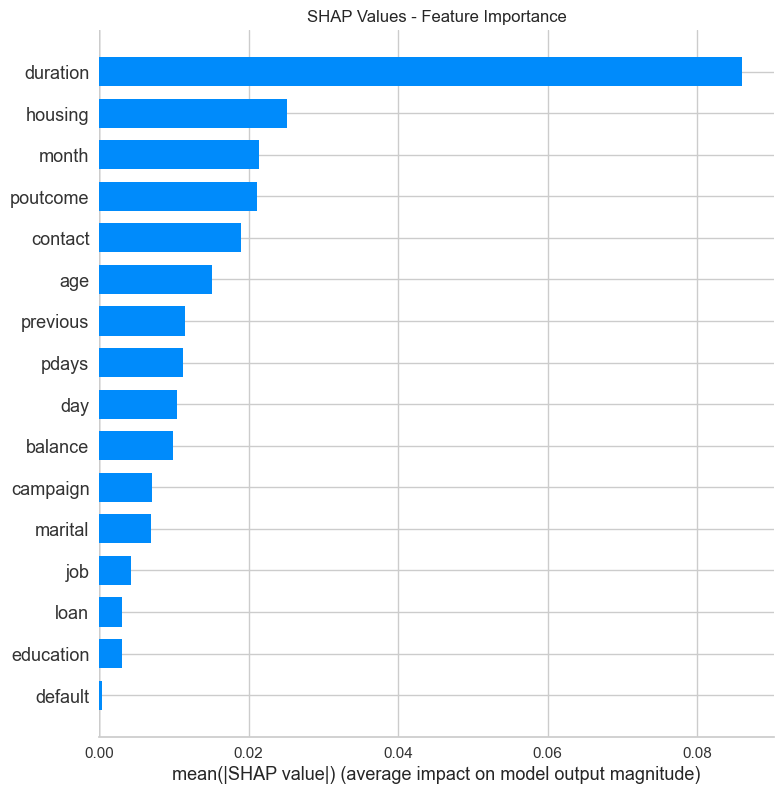

In [183]:
# Random Forest for training
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Create a SHAP explainer
explainer = shap.Explainer(rf)

# Calculate SHAP values for a set of samples (e.g., test set)
shap_values = explainer.shap_values(X_test)

# Summary plot of feature importance
shap.summary_plot(shap_values[1], X_test, plot_type="bar", show=False)
plt.title("SHAP Values - Feature Importance")
plt.show()


# Modelling without selection features

# Gaussian Naive Bayes

In [13]:
# Assuming you have your features X and target variable y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The o

Prior Probabilities for Gaussian Naive Bayes: {'0': 0.8830220874016494, '1': 0.11697791259835055}
Posterior Probabilities for Gaussian Naive Bayes - First Instance: [0.90704971 0.09295029]
Metrics for Gaussian Naive Bayes:
Accuracy: 0.8874
AUC: 0.7956
Recall: 0.2035
Precision: 0.5512
F1 Score: 0.2973


C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


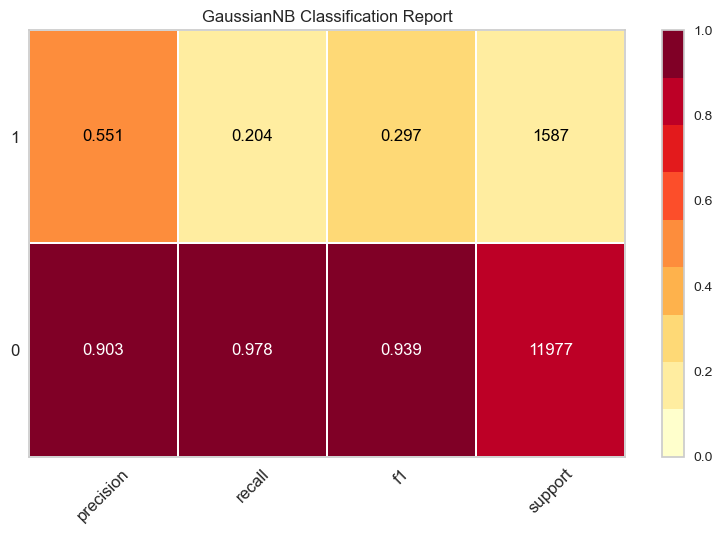

C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


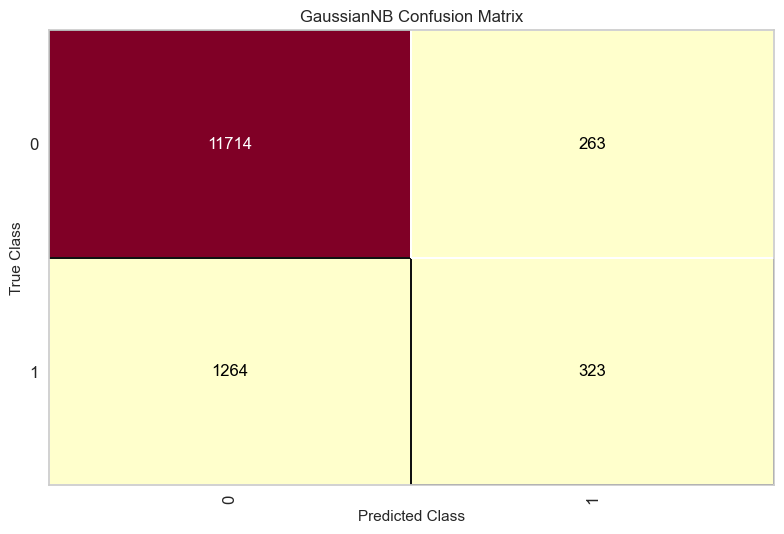

C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


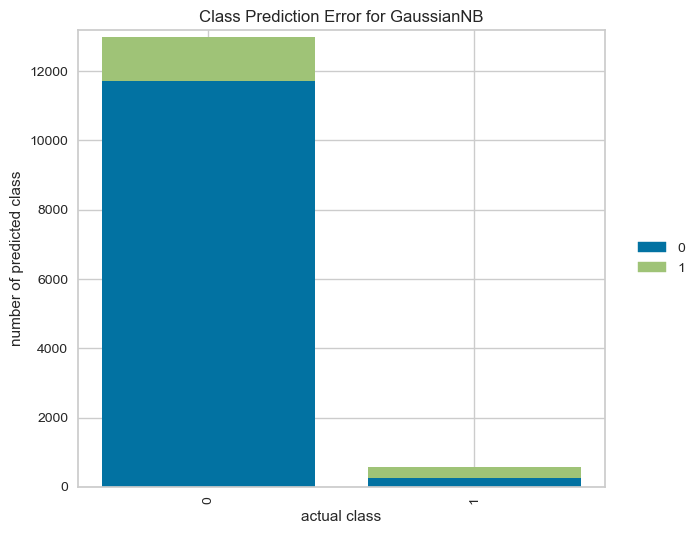

C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


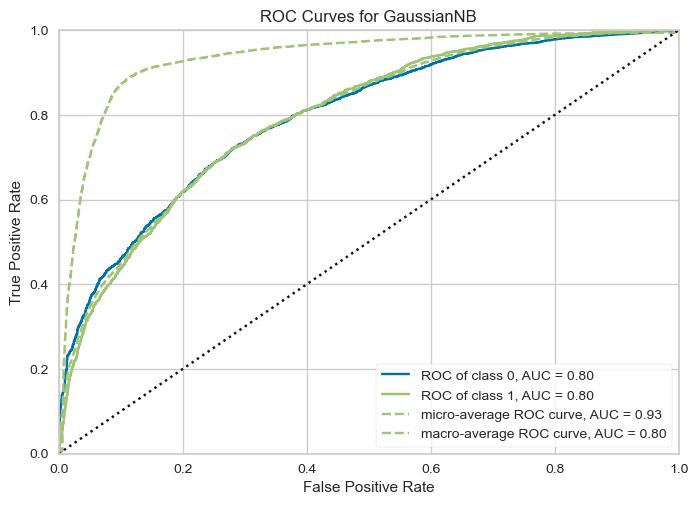

In [6]:
evaluate_Gaussian_naive_bayes(X_train, y_train, X_test, y_test)

# After selecting feature

In [5]:
# separating the data & label
new_X = data[['poutcome', 'contact', 'housing', 'duration', 'month', 'pdays', 'loan']]
new_y = data['y']
# Assuming you have your features X and target variable y
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.3, random_state=42, stratify=y)  

C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The o

Prior Probabilities for Gaussian Naive Bayes: {'0': 0.8830220874016494, '1': 0.11697791259835055}
Posterior Probabilities for Gaussian Naive Bayes - First Instance: [0.90704971 0.09295029]
Metrics for Gaussian Naive Bayes:
Accuracy: 0.8874
AUC: 0.7956
Recall: 0.2035
Precision: 0.5512
F1 Score: 0.2973


C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


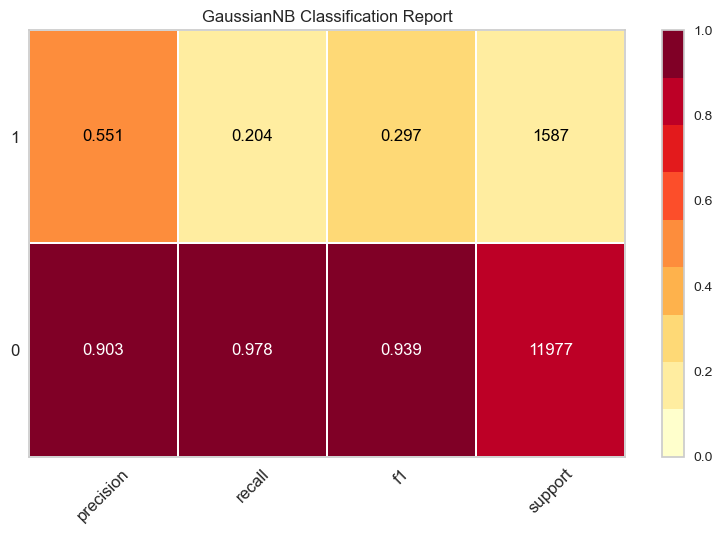

C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


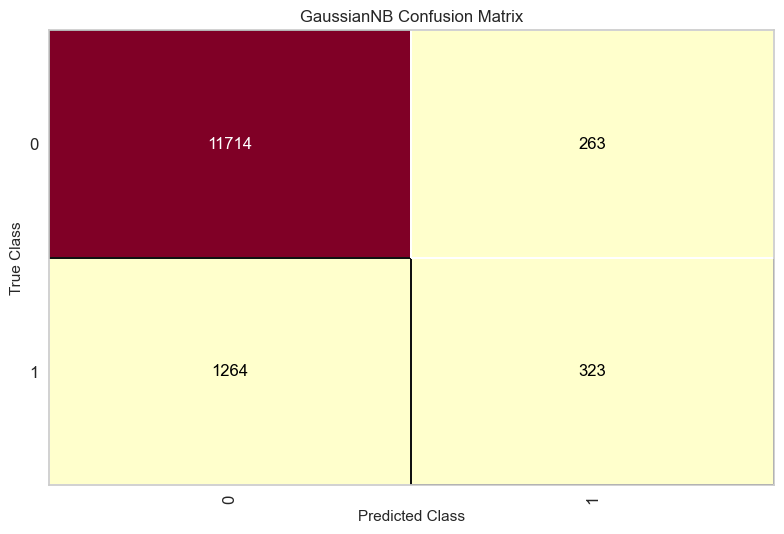

C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


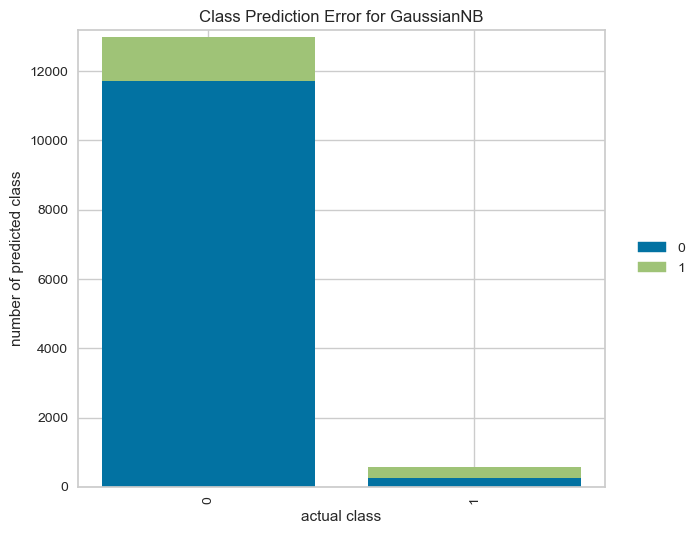

C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


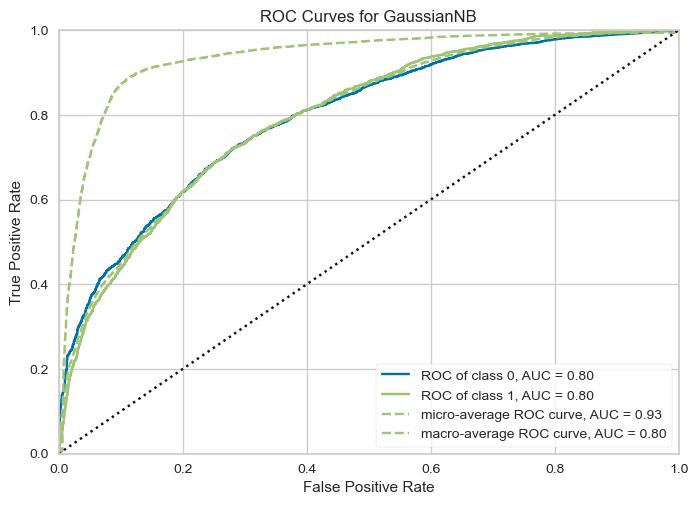

In [15]:
evaluate_Gaussian_naive_bayes(X_train, y_train, X_test, y_test)

C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The o

Metrics for Complement Naive Bayes:
Accuracy: 0.5537
AUC: 0.6260
Recall: 0.6333
Precision: 0.1552
F1 Score: 0.2493


C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but ComplementNB was fitted with feature names
  warnings.warn(


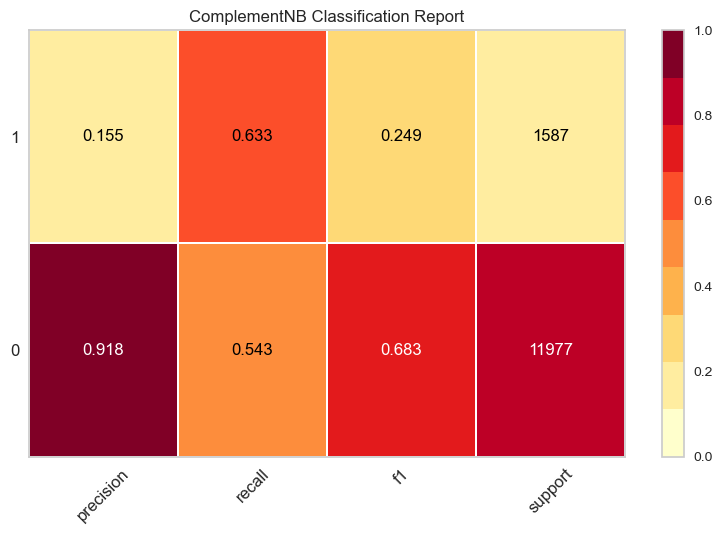

C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but ComplementNB was fitted with feature names
  warnings.warn(


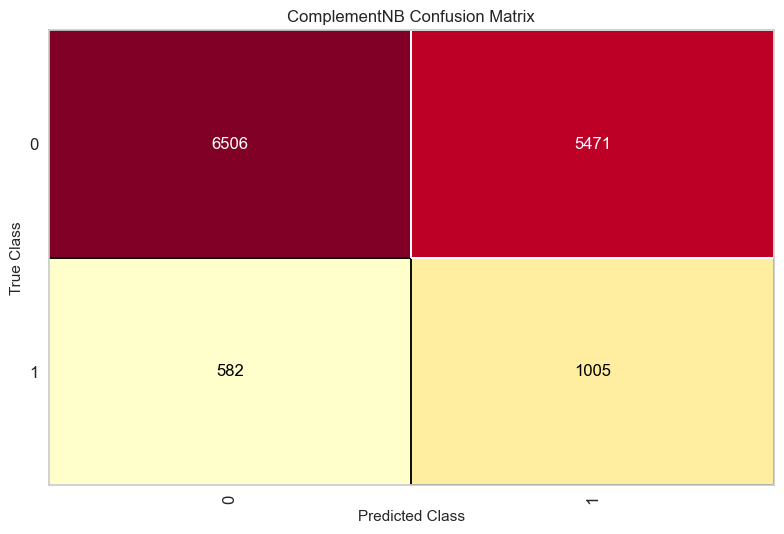

C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but ComplementNB was fitted with feature names
  warnings.warn(


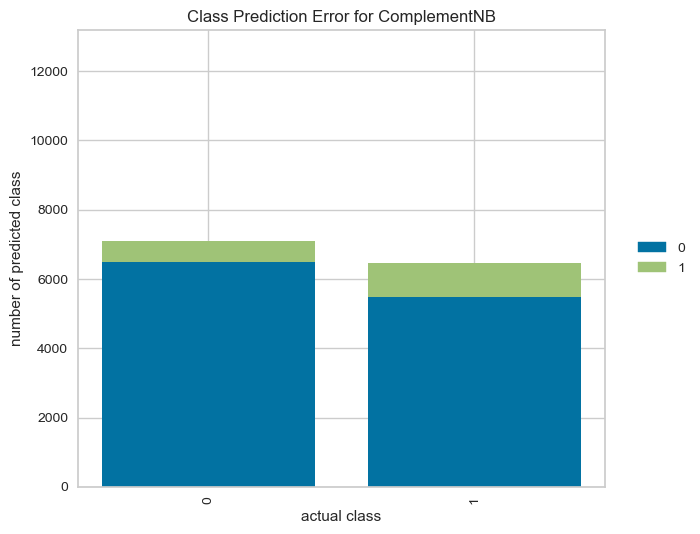

C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but ComplementNB was fitted with feature names
  warnings.warn(


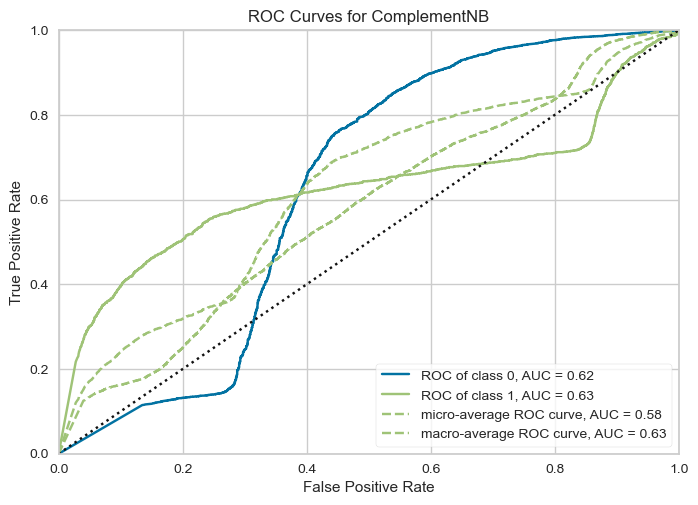

In [6]:
evaluate_Complement_naive_bayes(X_train, y_train, X_test, y_test)